In [1]:
# Importação das bibliotecas
%pip install pandas matplotlib numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuração opcional para visualização de gráficos no Jupyter/Colab
%matplotlib inline

# Configuração de estilo dos gráficos
plt.style.use('classic')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Caminho para o arquivo
caminho_arquivo = '/content/steam_games.csv'

# Carregando o dataset
try:
    dados = pd.read_csv('steam_games.csv')
    print("Dados carregados com sucesso!")
except UnicodeDecodeError:
    dados = pd.read_csv(caminho_arquivo, encoding='latin1')
    print("Dados carregados com encoding 'latin1'!")

#criando uma sample do dataset para github
dados.head(1000).to_csv('steam_games_sample.csv', index=False)

# Inspeção inicial
print(f"Dimensões do dataset: {dados.shape}")
print("Colunas disponíveis:")
print(dados.columns)


Dados carregados com sucesso!
Dimensões do dataset: (72934, 39)
Colunas disponíveis:
Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='str')


In [20]:
from tabulate import tabulate

In [5]:
dados.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [6]:
# Verificar valores nulos
print("Valores nulos por coluna:")
print(dados.isnull().sum())

# Verificar tipos de dados
print("\nTipos de dados:")
print(dados.dtypes)


Valores nulos por coluna:
AppID                             0
Name                              2
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 2532
Supported languages               0
Full audio languages              0
Reviews                       63717
Header image                      0
Website                       37493
Support url                   36228
Support email                 11340
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                69152
User score                        0
Positive                          0
Negative                          0
Score rank                    72892
Achievements                      0
Recommendations                   0
No

In [7]:
# Contar o número de materiais de demonstração
dados["Demo materials"] = dados["Screenshots"].fillna("").apply(lambda x: len(x.split(','))) + \
                          dados["Movies"].fillna("").apply(lambda x: len(x.split(',')))


In [8]:
# Remover linhas com Name nulo
dados = dados.dropna(subset=["Name"])

# Converter Release date para datetime
dados["Release date"] = pd.to_datetime(dados["Release date"], errors="coerce")

# Remover linhas com Release date inválido
dados = dados.dropna(subset=["Release date"])

# Limpeza básica do Estimated owners
dados["Estimated owners"] = dados["Estimated owners"].str.split(" - ").str[0].replace(",", "").astype(float)

# Verificar novamente valores nulos após a limpeza inicial
print(dados.isnull().sum())


AppID                             0
Name                              0
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 2530
Supported languages               0
Full audio languages              0
Reviews                       63616
Header image                      0
Website                       37452
Support url                   36186
Support email                 11308
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                69041
User score                        0
Positive                          0
Negative                          0
Score rank                    72766
Achievements                      0
Recommendations                   0
Notes                       

In [21]:
# Converter a coluna 'Release date' para o formato de data
dados.loc[:, 'Release date'] = pd.to_datetime(dados['Release date'], errors='coerce')

# Ordenar pela nota do Metacritic (decrescente) e pela data de lançamento (crescente)
dados_ordenados = dados.sort_values(by=['Metacritic score', 'Release date'], ascending=[False, True])

# Remover duplicatas considerando apenas o nome do jogo
dados_unicos = dados_ordenados.drop_duplicates(subset=['Name'])

# Selecionar os 10 primeiros jogos únicos
top_10_jogos = dados_unicos.head(10)

# Criar a tabela formatada com 'tabulate'
tabela_formatada = tabulate(top_10_jogos[['Name', 'Metacritic score', 'Release date']],
                            headers='keys', tablefmt='grid')

# Exibir a tabela formatada
print(tabela_formatada)




+-------+-----------------------------------------------------------------+--------------------+---------------------+
|       | Name                                                            |   Metacritic score | Release date        |
+=======+=================================================================+====================+=====================+
| 45752 | Disco Elysium - The Final Cut                                   |                 97 | 2019-10-15 00:00:00 |
+-------+-----------------------------------------------------------------+--------------------+---------------------+
| 64935 | Persona 5 Royal                                                 |                 97 | 2022-10-20 00:00:00 |
+-------+-----------------------------------------------------------------+--------------------+---------------------+
| 49557 | Half-Life                                                       |                 96 | 1998-11-08 00:00:00 |
+-------+---------------------------------------

In [13]:
# Verificar as categorias ou gêneros para garantir que temos jogos de role-playing
print(dados['Genres'].unique())  # Exemplo de verificação de gêneros


['Casual,Indie,Sports' 'Action,Indie' 'Action,Adventure,Indie,Strategy'
 ...
 'Adventure,Casual,Free to Play,Indie,Massively Multiplayer,RPG,Early Access'
 'Animation & Modeling,Design & Illustration,Software Training,Utilities,Game Development'
 'Adventure,Casual,Indie,Racing,Sports,Early Access']


In [17]:
# Filtrar jogos de role-playing, procurando por 'RPG' ou 'Role-Playing' dentro de 'Genres'
rpg_games = dados[dados['Genres'].str.contains('RPG|Role-Playing', case=False, na=False)]

# Verificar se a filtragem foi bem-sucedida
print(rpg_games.head())  # Exibe as primeiras linhas para garantir que a filtragem está correta



      AppID                    Name Release date  Estimated owners  Peak CCU  \
5   1469160          Wartune Reborn   2021-02-26           50000.0        68   
8   1178150   MazM: Jekyll and Hyde   2020-04-02               0.0         1   
10  1026420                  WARSAW   2019-10-02           20000.0         5   
14  1454010          Diary of Lucie   2020-11-25               0.0         3   
17   346560  Hero of the Kingdom II   2015-02-20          100000.0         5   

    Required age  Price  DLC count  \
5              0   0.00          0   
8              0  14.99          0   
10             0  23.99          0   
14             0  12.99          0   
17             0   7.99          0   

                                       About the game  \
5   Feel tired of auto-fight? Feel tired of boring...   
8   'MazM: Jekyll and Hyde' is a darkly entertaini...   
10  Use everything at your disposal to help a team...   
14  Diary of Lucie is action-roguelite game made w...   
17  S

In [23]:
# Calcular as métricas
media_dlc = rpg_games['DLC count'].mean()
max_dlc = rpg_games['DLC count'].max()

media_avaliacoes_pos = rpg_games['Positive'].mean()
max_avaliacoes_pos = rpg_games['Positive'].max()

media_avaliacoes_neg = rpg_games['Negative'].mean()
max_avaliacoes_neg = rpg_games['Negative'].max()

media_material = rpg_games['Demo materials'].mean()
max_material = rpg_games['Demo materials'].max()

# Criar um dicionário com os resultados
resultados = {
    'Métrica': [
        'Média DLCs', 'Máximo DLCs',
        'Média Avaliações Positivas', 'Máximo Avaliações Positivas',
        'Média Avaliações Negativas', 'Máximo Avaliações Negativas',
        'Média Materiais de Demonstração', 'Máximo Materiais de Demonstração'
    ],
    'Valor': [
        f"{media_dlc:.2f}", f"{max_dlc:.0f}",
        f"{media_avaliacoes_pos:.2f}", f"{max_avaliacoes_pos:.0f}",
        f"{media_avaliacoes_neg:.2f}", f"{max_avaliacoes_neg:.0f}",
        f"{media_material:.2f}", f"{max_material:.0f}"
    ]
}

# Criar a tabela formatada
tabela_formatada = tabulate(resultados, headers='keys', tablefmt='grid', numalign='right')

# Exibir a tabela
print(tabela_formatada)



+----------------------------------+---------+
| Métrica                          |   Valor |
+==================================+=========+
| Média DLCs                       |    0.95 |
+----------------------------------+---------+
| Máximo DLCs                      |    2366 |
+----------------------------------+---------+
| Média Avaliações Positivas       | 1516.17 |
+----------------------------------+---------+
| Máximo Avaliações Positivas      |  964983 |
+----------------------------------+---------+
| Média Avaliações Negativas       |  246.83 |
+----------------------------------+---------+
| Máximo Avaliações Negativas      |  129925 |
+----------------------------------+---------+
| Média Materiais de Demonstração  |   11.36 |
+----------------------------------+---------+
| Máximo Materiais de Demonstração |     187 |
+----------------------------------+---------+


In [27]:
# Filtrar jogos pagos
jogos_pagos = dados[dados['Price'] > 0]

# Contar o número de jogos pagos por empresa e pegar as 5 empresas com mais jogos pagos
empresas_mais_jogos = jogos_pagos['Publishers'].value_counts().head(5)

# Filtrar o DataFrame para apenas as 5 empresas com mais jogos pagos
top_5_empresas = jogos_pagos[jogos_pagos['Publishers'].isin(empresas_mais_jogos.index)]

# Calcular a média de avaliações positivas para essas empresas
media_avaliacoes = top_5_empresas.groupby('Publishers')['Positive'].mean()

# Calcular a mediana de avaliações positivas para essas empresas
mediana_avaliacoes = top_5_empresas.groupby('Publishers')['Positive'].median()

# Organizar os resultados em formato tabular
empresas = empresas_mais_jogos.index
quantidade_jogos = empresas_mais_jogos.values
media_avaliacoes_list = media_avaliacoes.values
mediana_avaliacoes_list = mediana_avaliacoes.values

# Criar a tabela
tabela_empresas = zip(empresas, quantidade_jogos, media_avaliacoes_list, mediana_avaliacoes_list)
headers = ["Empresa", "Jogos Pagos", "Média Avaliações Positivas", "Mediana Avaliações Positivas"]

# Exibir tabela
print(tabulate(tabela_empresas, headers=headers, tablefmt="grid"))



+----------------+---------------+------------------------------+--------------------------------+
| Empresa        |   Jogos Pagos |   Média Avaliações Positivas |   Mediana Avaliações Positivas |
+================+===============+==============================+================================+
| Big Fish Games |           443 |                      4.46025 |                            3   |
+----------------+---------------+------------------------------+--------------------------------+
| 8floor         |           239 |                      7.36343 |                            5   |
+----------------+---------------+------------------------------+--------------------------------+
| Strategy First |           160 |                     10.5385  |                            9   |
+----------------+---------------+------------------------------+--------------------------------+
| Laush Studio   |           157 |                     19.7771  |                           12   |
+---------

In [28]:
rpg_games.loc[:, 'Release date'] = pd.to_datetime(rpg_games['Release date'], errors='coerce')


In [32]:
# Filtrar jogos que suportam Linux
jogos_linux = dados[dados['Linux'] == 1]

# Garantir que a coluna 'Release date' seja do tipo datetime
dados['Release date'] = pd.to_datetime(dados['Release date'], errors='coerce')

# Contar o número de jogos para Linux por ano
jogos_linux_ano = jogos_linux.groupby(jogos_linux['Release date'].dt.year).size()

# Contagem de jogos para Linux entre 2018 e 2022
jogos_linux_ano = jogos_linux_ano.loc[2018:2022]

# Organizando a tabela
tabela = [[ano, jogos] for ano, jogos in jogos_linux_ano.items()]

# Imprimindo a tabela
print(tabulate(tabela, headers=["Ano", "Número de Jogos Linux"], tablefmt="grid"))



+-------+-------------------------+
|   Ano |   Número de Jogos Linux |
+=======+=========================+
|  2018 |                    1168 |
+-------+-------------------------+
|  2019 |                     922 |
+-------+-------------------------+
|  2020 |                    1081 |
+-------+-------------------------+
|  2021 |                    1210 |
+-------+-------------------------+
|  2022 |                    1311 |
+-------+-------------------------+


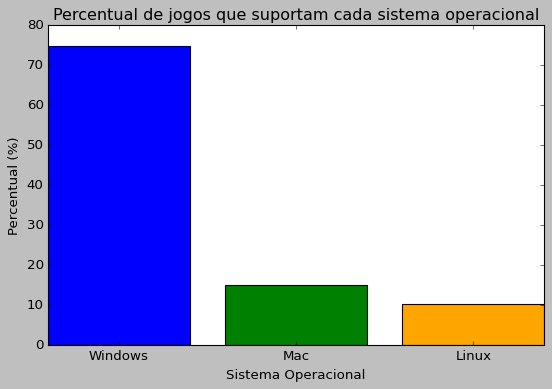

In [36]:
# Definir os sistemas operacionais que queremos verificar
sistemas_operacionais = ['Windows', 'Mac', 'Linux']

# Contagem de "votos" para cada sistema operacional
votos_sistemas = {'Windows': 0, 'Mac': 0, 'Linux': 0}

# Iterar sobre as linhas do DataFrame e contar votos para cada sistema operacional
for index, row in dados.iterrows():
    for sistema in sistemas_operacionais:
        if row[sistema] == 1:  # Se o jogo suporta o sistema operacional
            votos_sistemas[sistema] += 1

# Calcular o total de votos
total_votos = sum(votos_sistemas.values())

# Calcular o percentual de jogos que suportam cada sistema operacional
percentual_sistemas = {sistema: (votos / total_votos) * 100 for sistema, votos in votos_sistemas.items()}

# Criar gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(percentual_sistemas.keys(), percentual_sistemas.values(), color=['blue', 'green', 'orange'])
plt.title('Percentual de jogos que suportam cada sistema operacional')
plt.ylabel('Percentual (%)')
plt.xlabel('Sistema Operacional')
plt.show()



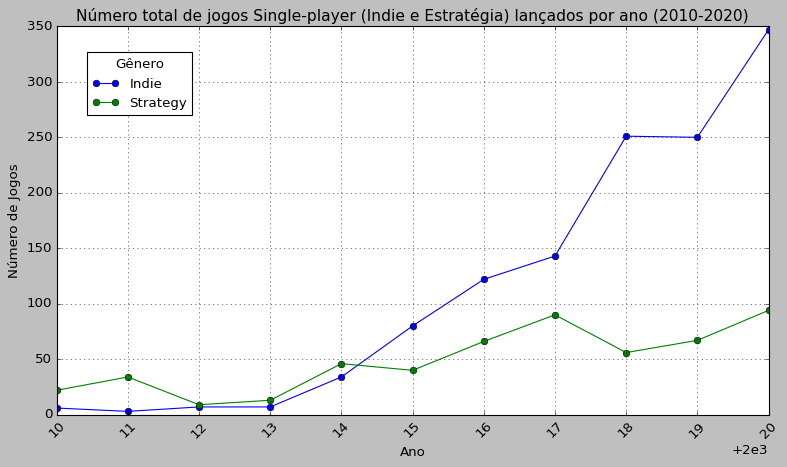

In [48]:
# Filtrar os jogos single-player
jogos_single_player = dados[dados['Categories'].str.contains('Single-player', case=False, na=False)]

# Filtrar os jogos dos gêneros Indie e Estratégia
jogos_indie_estrategia = jogos_single_player[jogos_single_player['Genres'].str.contains('Indie|Strategy', case=False, na=False)]

# Filtrar jogos lançados entre 2010 e 2020
jogos_2010_2020 = jogos_indie_estrategia[(jogos_indie_estrategia['Release date'].dt.year >= 2010) &
                                           (jogos_indie_estrategia['Release date'].dt.year <= 2020)]

# Contar o número de jogos por ano e gênero
contagem_ano = jogos_2010_2020.groupby([jogos_2010_2020['Release date'].dt.year, 'Genres']).size().unstack(fill_value=0)

# Garantir que apenas "Indie" e "Strategy" estão no gráfico
contagem_ano = contagem_ano[['Indie', 'Strategy']]  # Ajuste conforme os nomes corretos

# Gerar o gráfico
plt.figure(figsize=(10, 6))

# Plotar as linhas para Indie e Strategy com as mesmas cores
contagem_ano.plot(kind='line', marker='o', ax=plt.gca(), color=['blue', 'green'])

plt.title('Número total de jogos Single-player (Indie e Estratégia) lançados por ano (2010-2020)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Jogos', fontsize=12)
plt.xticks(range(2010, 2021), rotation=45)


# Ajustar a posição da legenda para o topo
plt.legend(title='Gênero', fontsize=12, loc='upper right', bbox_to_anchor=(0.2, 0.95))

plt.grid(True)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de texto
plt.show()



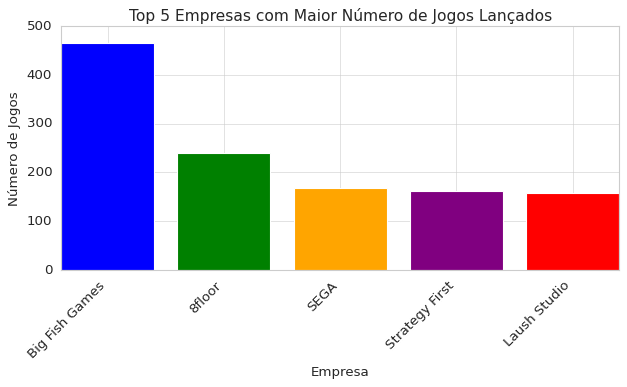

In [62]:
# Contar o número de jogos por empresa
contagem_empresas = dados['Publishers'].value_counts()

# Selecionar as 5 empresas com mais jogos
top_5_empresas = contagem_empresas.head(5)

# Criar gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(top_5_empresas.index, top_5_empresas.values, color=['blue', 'green', 'orange', 'purple', 'red'])

# Adicionar título e labels ao gráfico
plt.title('Top 5 Empresas com Maior Número de Jogos Lançados', fontsize=14)
plt.xlabel('Empresa', fontsize=12)
plt.ylabel('Número de Jogos', fontsize=12)

# Rotacionar o eixo X para melhorar a legibilidade
plt.xticks(rotation=45, ha='right')

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()


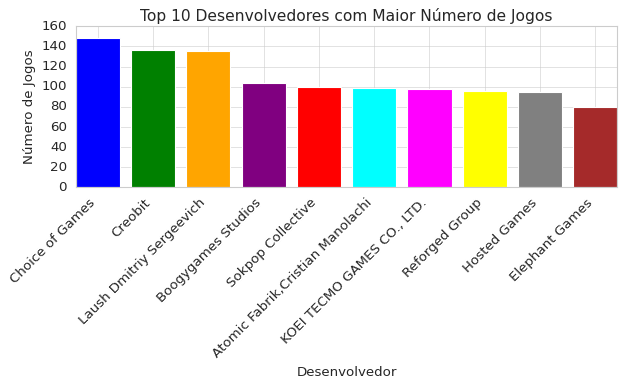

In [61]:
# Contar o número de jogos por desenvolvedor
contagem_desenv = dados['Developers'].value_counts()

# Selecionar os 10 desenvolvedores com mais jogos
top_10_desenv = contagem_desenv.head(10)

# Criar gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(top_10_desenv.index, top_10_desenv.values, color=['blue', 'green', 'orange', 'purple', 'red', 'cyan', 'magenta', 'yellow', 'grey', 'brown'])

# Adicionar título e labels ao gráfico
plt.title('Top 10 Desenvolvedores com Maior Número de Jogos', fontsize=14)
plt.xlabel('Desenvolvedor', fontsize=12)
plt.ylabel('Número de Jogos', fontsize=12)

# Rotacionar o eixo X para melhorar a legibilidade
plt.xticks(rotation=45, ha='right')

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()




